In [116]:
#importing all the required dependencies:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
% matplotlib inline

Data Collection:-

In [117]:
from google.colab.data_table import DataTable
DataTable.max_columns=50

In [119]:
df=pd.read_csv('/content/Shark_Tank_India.csv')
df.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df.shape

(121, 50)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Pitch Number               121 non-null    int64  
 4   Startup Name               121 non-null    object 
 5   Industry                   121 non-null    object 
 6   Business Description       121 non-null    object 
 7   Company Website            112 non-null    object 
 8   Number of Presenters       121 non-null    int64  
 9   Male Presenters            102 non-null    float64
 10  Female Presenters          62 non-null     float64
 11  Couple Presenters          120 non-null    float64
 12  Pitchers Average Age       121 non-null    object 
 13  Started in                 95 non-null     float64

Data Cleansing:-

In [122]:
df.isnull().sum()

Season Number                  0
Episode Number                 0
Episode Title                  0
Pitch Number                   0
Startup Name                   0
Industry                       0
Business Description           0
Company Website                9
Number of Presenters           0
Male Presenters               19
Female Presenters             59
Couple Presenters              1
Pitchers Average Age           0
Started in                    26
Pitchers City                  7
Pitchers State                 5
Yearly Revenue                69
Monthly Sales                 56
Gross Margin                  86
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                33
Total Deal Amount             54
Total Deal Equity             54
Total Deal Debt              112
Valuation Offered             54
Ashneer Investment Amount     67
Ashneer Investment Equity     67
Ashneer De

In [123]:
df['Number of sharks in deal'].mean()

2.2238805970149254

In [124]:
#Handling Missing Values-(Mean= for Numerical Data, Mode= For Categorical Data)
df['Number of sharks in deal'].fillna(df['Number of sharks in deal'].mean(),inplace=True)

In [125]:
df['Number of sharks in deal'].isnull().sum()

0

we can see in o/p of above cell that there are some other columns(specially columns that are containing information about debt,investment & equity) that are containing missing values but we can't simply replace that with mean/mode values of the column because columns of this dataset containing information which is very subjective for each case & scenario.

In [126]:
#checking for duplicate values:-
df.duplicated().value_counts()

False    121
dtype: int64

EXPLORATORY DATA ANALYSIS(EDA):-

In [127]:
df.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
count,121.0,121.000000,121.000000,121.000000,102.000000,62.000000,120.000000,95.000000,52.000000,6.500000e+01,...,56.000000,56.000000,1.0,53.000000,53.000000,5.000000,13.000000,13.000000,0.0,121.000000
mean,1.0,19.305785,61.000000,2.082645,1.735294,1.209677,0.208333,2018.052632,405.134615,1.455049e+06,...,15.973036,2.932964,50.0,14.899061,5.996981,23.400000,9.999250,3.592308,NaN,2.223881
std,0.0,10.375326,35.073732,0.927243,0.974186,0.483739,0.407819,2.481285,1055.349288,3.167937e+06,...,22.947765,5.810317,NaN,21.192558,13.631118,2.302173,12.378205,5.322352,NaN,0.864300
min,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2005.000000,0.000000,0.000000e+00,...,0.000000,0.000000,50.0,0.000000,0.000000,20.000000,0.000000,0.000000,NaN,1.000000
25%,1.0,11.000000,31.000000,1.000000,1.000000,1.000000,0.000000,2017.000000,53.750000,2.000000e+05,...,0.000000,0.000000,50.0,0.000000,0.000000,22.000000,0.000000,0.000000,NaN,2.000000
50%,1.0,19.000000,61.000000,2.000000,1.000000,1.000000,0.000000,2019.000000,112.500000,5.500000e+05,...,3.500008,0.875000,50.0,8.330000,1.000000,25.000000,0.000253,1.000000,NaN,2.223881
75%,1.0,28.000000,91.000000,3.000000,2.000000,1.000000,0.000000,2020.000000,255.500000,1.600000e+06,...,25.000000,4.250000,50.0,25.000000,5.000000,25.000000,20.000000,5.000000,NaN,2.223881
max,1.0,36.000000,121.000000,6.000000,6.000000,3.000000,1.000000,2022.000000,7200.000000,2.000000e+07,...,100.000000,40.000000,50.0,100.000000,75.000000,25.000000,33.330000,17.500000,NaN,5.000000


Initial insights about data:-

In [128]:
print(df['Season Number'].max(), "season")
print(df['Episode Number'].max(), "episodes")
print(df['Pitch Number'].max(), "start-up companies came for pitching")
print(df['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches per episodes")
print(df['Total Deal Amount'].sum()/100, "Total investment by the sharks(in crores)")

1 season
36 episodes
121 start-up companies came for pitching
[3 4] Pitches per episodes
39.0300106 Total investment by the sharks(in crores)


In [129]:
#Distribution of different industries that came for pitching:-
df1=df['Industry'].value_counts().sort_values(ascending=True)
fig=px.bar(df1,x='Industry',color='Industry',template='simple_white',text=df1)
fig.show()

Gender wise entrepreneurs:-

In [130]:
print("Total Pitchers-",df['Number of Presenters'].sum())
print("Total Male Pitchers-",df['Male Presenters'].sum())
print("Total Female Pitchers-",df['Female Presenters'].sum())
print("Male Pitchers Percentage-",round(df['Male Presenters'].sum()/df['Number of Presenters'].sum()*100,2))
print("Female Pitchers Percentage-",round(df['Female Presenters'].sum()/df['Number of Presenters'].sum()*100,2))

Total Pitchers- 252
Total Male Pitchers- 177.0
Total Female Pitchers- 75.0
Male Pitchers Percentage- 70.24
Female Pitchers Percentage- 29.76


Top 10 Brands in terms of yearly Revenue:-

In [132]:
df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10)

Startup Name
French Crown          7200.0
Guardian Gears        2500.0
Raising Superstars    1300.0
PlayBoxTV             1020.0
Alpino                1000.0
Hammer Lifestyle      1000.0
Shades of Spring       900.0
Tagz Foods             700.0
Devnagri               500.0
Moonshine              372.0
Name: Yearly Revenue, dtype: float64

Top 10 Highest gross margin of different brands:-

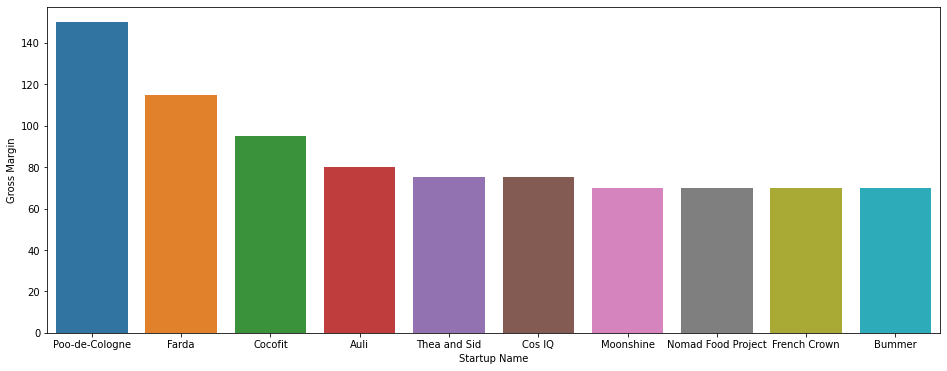

In [133]:
df2=df.sort_values('Gross Margin', ascending=False)[0:10]
plt.figure(figsize=(16,6))
sns.barplot(x='Startup Name',y='Gross Margin',data=df2,ci=None)

Total Received offer V/S Accepted offer:-(1=Yes,0=No)

1    73%
0    27%
Name: Received Offer, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



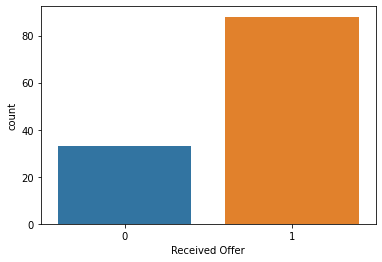

In [134]:
print(round(df['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(x='Received Offer',data=df)

1.0    76%
0.0    24%
Name: Accepted Offer, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



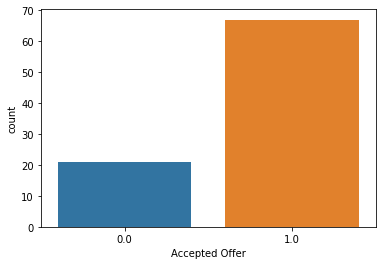

In [97]:
print(round(df['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(x='Accepted Offer',data=df)

From the Total offer received 76 % of offer has been accepted by the pitchers

In [135]:
#Company details who rejected sharks offer:-
df.loc[df['Accepted Offer']==0,["Startup Name","Valuation Requested","Valuation Offered"]]

,Startup Name,Valuation Requested,Valuation Offered
6,qZense Labs,40000,NaN
19,Torch-it,7500,NaN
20,La Kheer Deli,667,NaN
26,Kabira Handmad,2000,NaN
40,Morriko Pure Foods,3333,NaN
54,India Hemp and Co,1250,NaN
59,Keto India,12000,NaN
69,Moonshine,16000,NaN
70,Falhari,2500,NaN
72,Urban Monkey,10000,NaN


Industry wise investment by different sharks:-

In [136]:
dfa=df[df['Ashneer Investment Amount']>0][["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]]
dfa

,Startup Name,Ashneer Investment Amount,Ashneer Investment Equity
0,BluePine Foods,25.00,5.33
1,Booz Scooters,20.00,25.00
3,Tagz Foods,70.00,2.75
15,Skippi Ice Pops,20.00,3.00
18,Raising Superstars,50.00,2.00
21,Beyond Snack,25.00,1.25
23,Motion Breeze,30.00,6.00
29,EventBeep,10.00,1.00
38,The Yarn Bazaar,25.00,2.50
45,Bamboo India,25.00,1.75


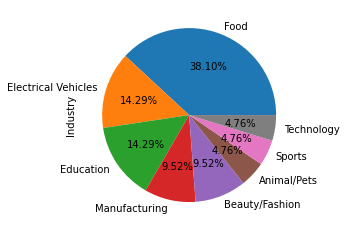

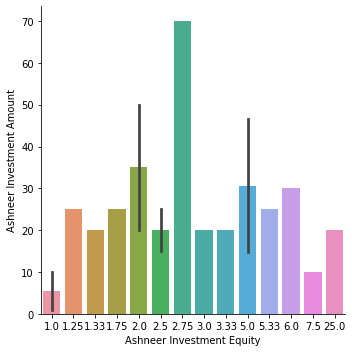

In [137]:
df[df['Ashneer Investment Amount']>0]['Industry'].value_counts().plot.pie(autopct="%1.2f%%")
df3=df[df['Ashneer Investment Amount']>0][["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]]
sns.catplot(x='Ashneer Investment Equity',y='Ashneer Investment Amount',kind="bar",data=df3)

similarly we can find for different sharks. 

In [138]:
#Number of sharks in a deal:-
print(round(df['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

2.223881    45%
1.000000    18%
2.000000    17%
3.000000    12%
4.000000     4%
5.000000     3%
Name: Number of sharks in deal, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Debt Distribution  for different sharks:-

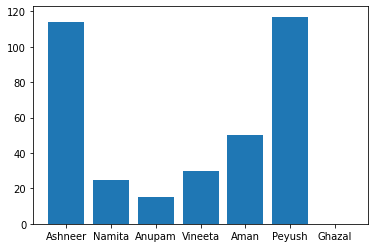

In [139]:
Amount=[df['Ashneer Debt Amount'].sum(),df['Namita Debt Amount'].sum(),df['Anupam Debt Amount'].sum(),df['Vineeta Debt Amount'].sum(),df['Aman Debt Amount'].sum(),
        df['Peyush Debt Amount'].sum(),df['Ghazal Debt Amount'].sum()]
Name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal']
df4={'NAME':Name,'AMOUNT(LAKHS)':Amount}
plt.bar(df4['NAME'],df4['AMOUNT(LAKHS)'])
plt.show()

Companies who got same or more valuation than they requested:-

In [142]:
df.loc[df['Valuation Requested']<=df["Valuation Offered"]][["Startup Name","Valuation Requested","Valuation Offered"]]

,Startup Name,Valuation Requested,Valuation Offered
21,Beyond Snack,2000,2000.0
44,Cocofit,0,0.0
85,Watt Technovations,0,0.0


THANK YOU